Vector

[[-2.0, -0.6666666666666669, 0.6666666666666665, 2.0]

]

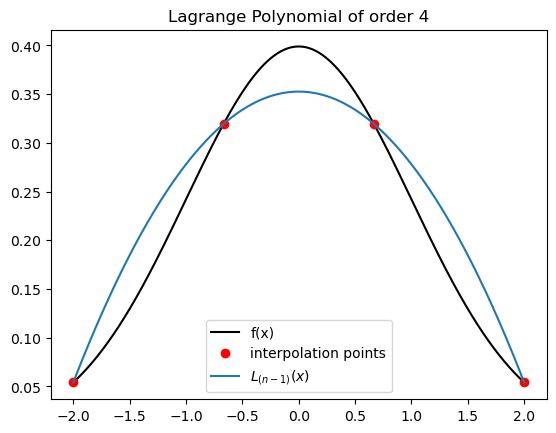

In [26]:
using PyPlot
include("my_lagrange.jl") # note that this file will be undisclosed later
f(x)=exp(-x^2/2)/sqrt(2π);
n = 4; #number of interpolating points;
a,b = -2,2; #extrema of the interval [a,b]
vecx = LinRange(a,b,n); # partition of the [a,b] interval into n equispaced points
print(Vector[vecx])
xinterval = LinRange(a,b,1024); # a finer division of the interval to see what is going on.
ypoly = [lagrange_polynomial(x,vecx,f.(vecx)) for x in xinterval] # L₂(x) computed over xinterval
close("all")
plot(xinterval,f.(xinterval),"-k");
plot(vecx,f.(vecx),"ro"); 
plot(xinterval, ypoly)
legend(["f(x)","interpolation points",L"L_{(n-1)}(x)"])
title("Lagrange Polynomial of order $n")
gcf()


In [16]:
using QuadGK 

[2.2615501857671617e-17 0.729499017813491 1.1753102443369325 0.9860881965720558 0.9794783643016487 0.9777965203428308 0.9773847627190324 0.9772833499750472 0.9772582071661425 0.9772519488410506; 0.5939006316450687 0.19796882516975578 0.7375217575551319 0.9588305571335367 0.9727602472449632 0.9761548353304039 0.9769799766127281 0.9771828979611838 0.9772331894365424 0.9772457064492996; 0.19796687721502293 0.5523222869322459 1.029380748742999 0.9770023167592161 0.9772389919494204 0.977249292005355 0.9772498340169307 0.977249865970426 0.9772498679229427 0.9772498680438] 0.9772498680518209 5.719045265969914e-9

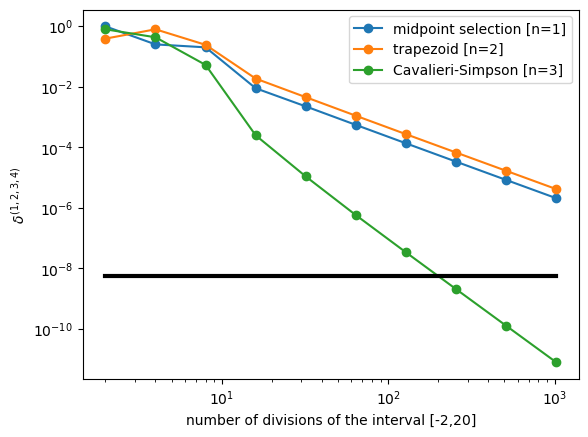

In [62]:
include("my_lagrange.jl") # note that this file will be undisclosed later
close("all"); 
a,b=-2,20; 
n = [2, 4, 8 ,16 ,32,64,128,256,512,1024]; 
#n= 10000
myf=x->exp(-x^2/2)/sqrt(2π); 
res,deltares=quadgk(myf,a,b); # true value (very good approximation)
res_lagr=[numint(myf, a,b,nstep=n,nlagrange=i) for i in 1:3, n in n]; 
print(res_lagr," ",res," ",deltares)
for j in (1,2,3) 
    loglog(n, abs.(res_lagr[j,:].-res),"-o"); 
end; 
plot(n,deltares*ones(length(n)),"-k",linewidth=3);
plt.xlabel("number of divisions of the interval [$a,$b]")
plt.ylabel(L"\delta^{(1,2,3,4)}")
plt.legend(["midpoint selection [n=1]","trapezoid [n=2]","Cavalieri-Simpson [n=3]"],loc=0);
gcf()